In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [2]:
np.random.seed(42)

simulation_results = []

for i in range(1000):
    n_features = np.random.randint(5, 20)
    noise = np.random.uniform(0, 30)
    bias = np.random.uniform(-10, 10)
    
    X, y = make_regression(
        n_samples=100,
        n_features=n_features,
        noise=noise,
        bias=bias
    )
    
    simulation_results.append([
        n_features,
        noise,
        bias,
        X.mean(),
        X.std(),
        y.mean(),
        y.std()
    ])


In [3]:
columns = [
    "n_features",
    "noise",
    "bias",
    "X_mean",
    "X_std",
    "y_mean",
    "y_std"
]

df = pd.DataFrame(simulation_results, columns=columns)
df.head()


,n_features,noise,bias,X_mean,X_std,y_mean,y_std
0,11,23.896290,-6.331304,0.044531,1.061501,23.770662,213.016512
1,10,20.084609,9.882787,-0.034012,0.986282,-10.101240,185.001557
2,13,25.194048,-6.229188,0.000080,0.991407,-5.082535,156.115739
3,12,23.818054,8.819846,-0.029849,1.002312,3.750670,194.722720
4,18,10.368811,6.154047,-0.041878,1.021066,-27.521754,164.921578


In [4]:
df.to_csv("simulated_dataset.csv", index=False)


In [5]:
X = df.drop("y_mean", axis=1)
y = df["y_mean"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append([name, rmse, mae, r2])


In [7]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "RMSE", "MAE", "R2_Score"]
)

results_df.sort_values("RMSE")


,Model,RMSE,MAE,R2_Score
0,Linear Regression,10.865713,8.345886,0.571589
4,Random Forest,10.982283,8.559881,0.562348
1,Ridge Regression,11.942410,9.225463,0.482479
2,Lasso Regression,15.351487,12.162347,0.144845
5,SVR,16.356086,12.688122,0.029260
6,KNN,16.752155,13.418107,-0.018322
3,Decision Tree,16.993920,13.049983,-0.047927


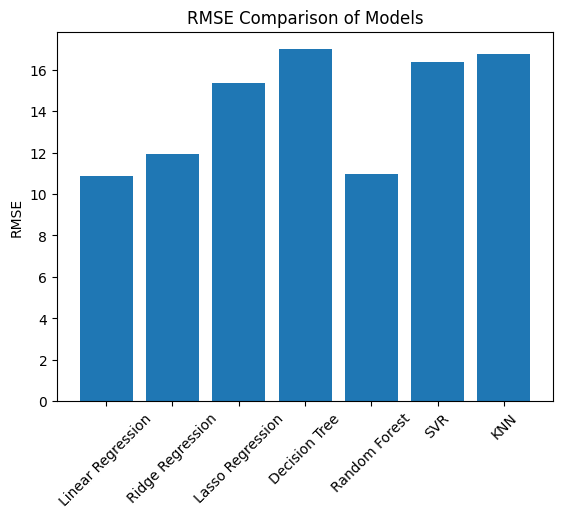

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure()
plt.bar(results_df["Model"], results_df["RMSE"])
plt.xticks(rotation=45)
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Models")
plt.show()
plt.savefig("plots/rmse_comparison.png", bbox_inches="tight")



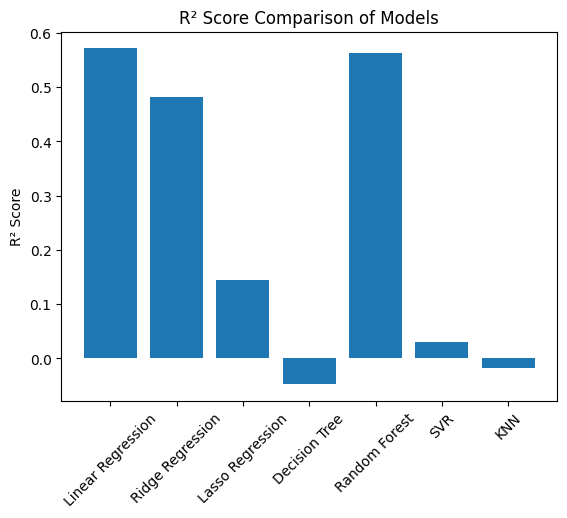

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure()
plt.bar(results_df["Model"], results_df["R2_Score"])
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title("R² Score Comparison of Models")
plt.show()
plt.savefig("plots/r2_comparison.png", bbox_inches="tight")
